In [1]:
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

import time
from scipy import stats
from scipy.stats import zscore
import random
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from copy import deepcopy

In [2]:
df=pd.read_csv('final.csv')

In [18]:
df.head()

,record,date,ssn,firstname,lastname,address,zip5,dob,homephone,fraud_label,...,ssn_dob_homephone_count_1_by_14,ssn_dob_homephone_count_1_by_30,ssn_homephone_name_dob_count_0_by_3,ssn_homephone_name_dob_count_0_by_7,ssn_homephone_name_dob_count_0_by_14,ssn_homephone_name_dob_count_0_by_30,ssn_homephone_name_dob_count_1_by_3,ssn_homephone_name_dob_count_1_by_7,ssn_homephone_name_dob_count_1_by_14,ssn_homephone_name_dob_count_1_by_30
0,1,2016-01-01,379070012,XRRAMMTR,SMJETJMJ,6861 EUTST PL,2765,1,1797504115,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
1,2,2016-01-01,387482503,MAMSTUJR,RTTEMRRR,7280 URASA PL,57169,19340615,4164239415,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
2,3,2016-01-01,200332444,SZMMUJEZS,EUSEZRAE,5581 RSREX LN,56721,3,216537580,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
3,4,2016-01-01,747451317,SJJZSXRSZ,ETJXTXXS,1387 UJZXJ RD,35286,19440430,132144161,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
4,5,2016-01-01,24065868,SSSXUEJMS,SSUUJXUZ,279 EAASA WY,3173,19980315,6101082272,0,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0


In [3]:
numerical_index = df.columns.get_loc("ssn_day_since")+1 
df_numerical = pd.concat([df['fraud_label'],df.iloc[:,numerical_index:]], axis=1)

In [13]:
df_numerical.head()

,fraud_label,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,ssn_count_14,ssn_count_30,address_day_since,address_count_0,address_count_1,...,ssn_dob_homephone_count_1_by_14,ssn_dob_homephone_count_1_by_30,ssn_homephone_name_dob_count_0_by_3,ssn_homephone_name_dob_count_0_by_7,ssn_homephone_name_dob_count_0_by_14,ssn_homephone_name_dob_count_0_by_30,ssn_homephone_name_dob_count_1_by_3,ssn_homephone_name_dob_count_1_by_7,ssn_homephone_name_dob_count_1_by_14,ssn_homephone_name_dob_count_1_by_30
0,0,1,1,1,1,1,1,365.0,1,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
1,1,1,1,1,1,1,1,365.0,1,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
2,0,1,1,1,1,1,1,365.0,1,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
3,0,1,1,1,1,1,1,365.0,1,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0
4,0,1,1,1,1,1,1,365.0,1,1,...,14.0,30.0,3.0,7.0,14.0,30.0,3.0,7.0,14.0,30.0


In [14]:
len(df_numerical)

1000000

In [4]:
df_numerical.insert(1, 'rand_num', np.random.rand(1000000))
df_numerical.head()

,fraud_label,rand_num,ssn_count_0,ssn_count_1,ssn_count_3,ssn_count_7,ssn_count_14,ssn_count_30,address_day_since,address_count_0,address_count_1,address_count_3,address_count_7,address_count_14,address_count_30,dob_day_since,dob_count_0,dob_count_1,dob_count_3,dob_count_7,dob_count_14,dob_count_30,homephone_day_since,homephone_count_0,homephone_count_1,homephone_count_3,homephone_count_7,homephone_count_14,homephone_count_30,name_day_since,name_count_0,name_count_1,name_count_3,name_count_7,name_count_14,name_count_30,fulladdress_day_since,fulladdress_count_0,fulladdress_count_1,fulladdress_count_3,fulladdress_count_7,fulladdress_count_14,fulladdress_count_30,name_dob_day_since,name_dob_count_0,name_dob_count_1,name_dob_count_3,name_dob_count_7,name_dob_count_14,name_dob_count_30,name_fulladdress_day_since,name_fulladdress_count_0,name_fulladdress_count_1,name_fulladdress_count_3,name_fulladdress_count_7,name_fulladdress_count_14,name_fulladdress_count_30,name_homephone_day_since,name_homephone_count_0,name_homephone_count_1,name_homephone_count_3,name_homephone_count_7,name_homephone_count_14,name_homephone_count_30,fulladdress_dob_day_since,fulladdress_dob_count_0,fulladdress_dob_count_1,fulladdress_dob_count_3,fulladdress_dob_count_7,fulladdress_dob_count_14,fulladdress_dob_count_30,fulladdress_homephone_day_since,fulladdress_homephone_count_0,fulladdress_homephone_count_1,fulladdress_homephone_count_3,fulladdress_homephone_count_7,fulladdress_homephone_count_14,fulladdress_homephone_count_30,dob_homephone_day_since,dob_homephone_count_0,dob_homephone_count_1,dob_homephone_count_3,dob_homephone_count_7,dob_homephone_count_14,dob_homephone_count_30,homephone_name_dob_day_since,homephone_name_dob_count_0,homephone_name_dob_count_1,homephone_name_dob_count_3,homephone_name_dob_count_7,homephone_name_dob_count_14,homephone_name_dob_count_30,ssn_firstname_day_since,ssn_firstname_count_0,ssn_firstname_count_1,ssn_firstname_count_3,ssn_firstname_count_7,ssn_firstname_count_14,ssn_firstname_count_30,ssn_lastname_day_since,ssn_lastname_count_0,ssn_lastname_count_1,ssn_lastname_count_3,ssn_lastname_count_7,ssn_lastname_count_14,ssn_lastname_count_30,ssn_address_day_since,ssn_address_count_0,ssn_address_count_1,ssn_address_count_3,ssn_address_count_7,ssn_address_count_14,ssn_address_count_30,ssn_zip5_day_since,ssn_zip5_count_0,ssn_zip5_count_1,ssn_zip5_count_3,ssn_zip5_count_7,ssn_zip5_count_14,ssn_zip5_count_30,ssn_dob_day_since,ssn_dob_count_0,ssn_dob_count_1,ssn_dob_count_3,ssn_dob_count_7,ssn_dob_count_14,ssn_dob_count_30,ssn_homephone_day_since,ssn_homephone_count_0,ssn_homephone_count_1,ssn_homephone_count_3,ssn_homephone_count_7,ssn_homephone_count_14,ssn_homephone_count_30,ssn_name_day_since,ssn_name_count_0,ssn_name_count_1,ssn_name_count_3,ssn_name_count_7,ssn_name_count_14,ssn_name_count_30,ssn_fulladdress_day_since,ssn_fulladdress_count_0,ssn_fulladdress_count_1,ssn_fulladdress_count_3,ssn_fulladdress_count_7,ssn_fulladdress_count_14,ssn_fulladdress_count_30,ssn_name_dob_day_since,ssn_name_dob_count_0,ssn_name_dob_count_1,ssn_name_dob_count_3,ssn_name_dob_count_7,ssn_name_dob_count_14,ssn_name_dob_count_30,ssn_name_fulladdress_day_since,ssn_name_fulladdress_count_0,ssn_name_fulladdress_count_1,ssn_name_fulladdress_count_3,ssn_name_fulladdress_count_7,ssn_name_fulladdress_count_14,ssn_name_fulladdress_count_30,ssn_name_homephone_day_since,ssn_name_homephone_count_0,ssn_name_homephone_count_1,ssn_name_homephone_count_3,ssn_name_homephone_count_7,ssn_name_homephone_count_14,ssn_name_homephone_count_30,ssn_fulladdress_dob_day_since,ssn_fulladdress_dob_count_0,ssn_fulladdress_dob_count_1,ssn_fulladdress_dob_count_3,ssn_fulladdress_dob_count_7,ssn_fulladdress_dob_count_14,ssn_fulladdress_dob_count_30,ssn_fulladdress_homephone_day_since,ssn_fulladdress_homephone_count_0,ssn_fulladdress_homephone_count_1,ssn_fulladdress_homephone_count_3,ssn_fulladdress_homephone_count_7,ssn_fulladdress_homephone_count_14,ssn_fulladdress_homephon

In [6]:
df_oot = df_numerical.loc[ df['date'] > '2016-11-01']

In [7]:
#df_oot.to_csv('df_oot.csv')

In [8]:
df_modeling = df_numerical.loc[((df['date'] < '2016-11-01') & (df['date'] > '2016-01-14'))]

In [23]:
#df_modeling.to_csv('df_modeling.csv')

In [2]:
#df_modeling_zscale.to_csv('df_modeling_zscale.csv')
#df_modeling_zscale=pd.read_csv('df_modeling_zscale.csv')

In [3]:
data = deepcopy(df_modeling)

In [4]:
good_ind = np.where(data['fraud_label'] == 0)
bad_ind = np.where(data['fraud_label'] == 1)
good = data.iloc[good_ind]
bad = data.iloc[bad_ind]

In [5]:
KSFDR = np.zeros([2, data.shape[1]])
numbads = data['fraud_label'].sum()
topRows = int(round(len(data)*0.03))
print('Top 3% rows:',topRows)
print('No of frauds',numbads)

start_time = pd.datetime.now()

j = 0
for column in data:
#     KS statistic
    KSFDR[0][j] = stats.ks_2samp(good[column],bad[column])[0]
#     FDR
    temp = data.sort_values(column,ascending=False)
    temp1 = temp.head(topRows)
    temp2 = temp.tail(topRows)
    needed1 = temp1.loc[:,'fraud_label']
    needed2 = temp2.loc[:,'fraud_label']
    FDR1 = sum(needed1)/numbads
    FDR2 = sum(needed2)/numbads
    FDRate = np.maximum(FDR1,FDR2)
    KSFDR[1][j] = FDRate
    j = j +1
print('duration: ', pd.datetime.now() - start_time)

Top 3% rows: 23850
No of frauds 11486


<ipython-input-5-b6287e0c1da8>:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


duration:  1:12:34.197088


<ipython-input-5-b6287e0c1da8>:24: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print('duration: ', pd.datetime.now() - start_time)


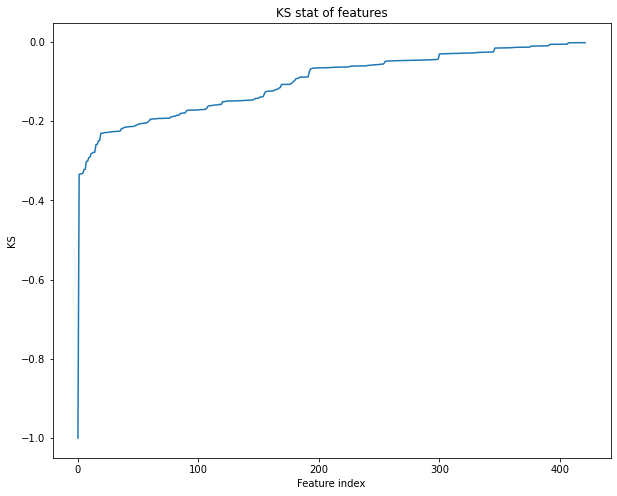

In [6]:
plt.figure(figsize=(10,8))
plt.plot(np.sort(-KSFDR[0][:]))
plt.title("KS stat of features")
plt.ylabel('KS')
plt.xlabel('Feature index')
# plt.savefig("KS_HW5.png", dpi=200)
plt.show()

In [8]:
col_name_red = data.columns
res_df_prof = pd.DataFrame.from_dict({'KS':KSFDR[0][:],'FDR':KSFDR[1][:]},orient='index',
                       columns=col_name_red)

In [9]:
res_df_prof = res_df_prof.transpose()
res_df_prof['Avg'] = res_df_prof.mean(axis = 1)
res_df_prof['KS Rank'] = res_df_prof['KS'].rank(ascending = False)
res_df_prof['FDR Rank'] = res_df_prof['FDR'].rank(ascending=False)
res_df_prof['Average Rank'] = res_df_prof[['KS Rank','FDR Rank']].mean(axis = 1)
res_df_prof_filter = res_df_prof.sort_values(by='Average Rank',ascending=True)
# res_df_filter = res_df_filter.drop(columns='rank_avg')
res_df_prof_filter

,KS,FDR,Avg,KS Rank,FDR Rank,Average Rank
fraud_label,1.000000,1.000000,1.000000,1.0,1.0,1.0
fulladdress_day_since,0.333210,0.358349,0.345780,3.0,2.0,2.5
address_day_since,0.334096,0.355302,0.344699,2.0,3.0,2.5
fulladdress_count_30,0.332032,0.354954,0.343493,5.0,4.0,4.5
address_count_30,0.332725,0.353300,0.343012,4.0,5.0,4.5
...,...,...,...,...,...,...
ssn_homephone_count_0,0.001793,0.034738,0.018265,415.0,417.0,416.0
ssn_fulladdress_dob_count_0,0.001729,0.034738,0.018233,420.0,417.0,418.5
ssn_homephone_name_dob_count_0,0.001736,0.034651,0.018194,419.0,420.0,419.5
ssn_fulladdress_homephone_count_0,0.001715,0.034651,0.018183,421.0,420.0,420.5


In [14]:
#res_df_prof_filter.to_csv('feature selection.csv')

In [35]:
res_df_prof_filter=pd.read_csv('feature selection 1.csv',index_col=0)
df_modeling=pd.read_csv('df_modeling.csv')

In [36]:
Y_labels = df_modeling['fraud_label']
features_chosen_filter = res_df_prof_filter.index.values[1:81] #1st column is the fraud label
features_chosen_filter

array(['fulladdress_day_since', 'address_day_since',
       'fulladdress_count_30', 'address_count_30', 'address_count_14',
       'fulladdress_count_14', 'address_count_7', 'fulladdress_count_7',
       'address_count_0_by_14', 'fulladdress_count_0_by_14',
       'fulladdress_count_3', 'address_count_3',
       'fulladdress_count_0_by_30', 'address_count_0_by_30',
       'address_count_0_by_7', 'fulladdress_count_0_by_7',
       'address_count_1', 'fulladdress_count_1',
       'fulladdress_homephone_count_30',
       'fulladdress_homephone_day_since', 'ssn_dob_count_30',
       'ssn_dob_day_since', 'name_dob_day_since', 'name_dob_count_30',
       'ssn_count_30', 'fulladdress_count_0_by_3', 'address_count_0_by_3',
       'ssn_firstname_day_since', 'ssn_lastname_day_since',
       'ssn_name_dob_day_since', 'ssn_name_dob_count_30',
       'ssn_firstname_count_30', 'ssn_lastname_count_30',
       'ssn_name_day_since', 'ssn_name_count_30',
       'fulladdress_homephone_count_14', 'name_do

In [6]:
X_data = df_modeling[features_chosen_filter]
print(X_data.shape)
X_data.head()

(794996, 80)


,fulladdress_day_since,address_day_since,fulladdress_count_30,address_count_30,address_count_14,fulladdress_count_14,address_count_7,fulladdress_count_7,address_count_0_by_14,fulladdress_count_0_by_14,fulladdress_count_3,address_count_3,fulladdress_count_0_by_30,address_count_0_by_30,address_count_0_by_7,fulladdress_count_0_by_7,address_count_1,fulladdress_count_1,fulladdress_homephone_count_30,fulladdress_homephone_day_since,ssn_dob_count_30,ssn_dob_day_since,name_dob_day_since,name_dob_count_30,ssn_count_30,fulladdress_count_0_by_3,address_count_0_by_3,ssn_firstname_day_since,ssn_lastname_day_since,ssn_name_dob_day_since,ssn_name_dob_count_30,ssn_firstname_count_30,ssn_lastname_count_30,ssn_name_day_since,ssn_name_count_30,fulladdress_homephone_count_14,name_dob_count_14,ssn_dob_count_14,ssn_count_14,name_count_30,ssn_name_dob_count_14,ssn_firstname_count_14,ssn_lastname_count_14,ssn_name_count_14,address_count_1_by_14,ssn_dob_count_0_by_30,fulladdress_count_1_by_14,name_dob_count_0_by_30,ssn_name_dob_count_0_by_30,ssn_firstname_count_0_by_30,ssn_lastname_count_0_by_30,ssn_name_count_0_by_30,fulladdress_homephone_count_0_by_30,fulladdress_homephone_count_7,name_dob_count_0_by_14,name_day_since,name_dob_count_7,ssn_count_0_by_14,ssn_dob_count_0_by_14,ssn_dob_count_7,name_count_14,ssn_count_7,ssn_firstname_count_0_by_14,ssn_lastname_count_0_by_14,ssn_count_0_by_30,ssn_firstname_count_7,ssn_name_dob_count_0_by_14,ssn_name_dob_count_7,ssn_lastname_count_7,homephone_count_7,homephone_count_3,fulladdress_homephone_count_0_by_14,ssn_name_count_0_by_14,ssn_name_count_7,fulladdress_count_1_by_30,name_count_7,address_count_0,address_count_1_by_7,fulladdress_count_0,homephone_count_14
0,365.0,365.0,1,1,1,1,1,1,14.0,14.0,1,1,30.0,30.0,7.0,7.0,1,1,1,365.0,1,365.0,365.0,1,1,3.0,3.0,365.0,365.0,365.0,1,1,1,365.0,1,1,1,1,1,1,1,1,1,1,14.0,30.0,14.0,30.0,30.0,30.0,30.0,30.0,30.0,1,14.0,365.0,1,14.0,14.0,1,1,1,14.0,14.0,30.0,1,14.0,1,1,3,1,14.0,14.0,1,30.0,1,1,7.0,1,4
1,365.0,365.0,1,1,1,1,1,1,14.0,14.0,1,1,30.0,30.0,7.0,7.0,1,1,1,365.0,1,365.0,365.0,1,1,3.0,3.0,365.0,365.0,365.0,1,1,1,365.0,1,1,1,1,1,1,1,1,1,1,14.0,30.0,14.0,30.0,30.0,30.0,30.0,30.0,30.0,1,14.0,365.0,1,14.0,14.0,1,1,1,14.0,14.0,30.0,1,14.0,1,1,3,2,14.0,14.0,1,30.0,1,1,7.0,1,6
2,365.0,365.0,1,1,1,1,1,1,14.0,14.0,1,1,30.0,30.0,7.0,7.0,1,1,1,365.0,1,365.0,365.0,1,1,3.0,3.0,365.0,365.0,365.0,1,1,1,365.0,1,1,1,1,1,1,1,1,1,1,14.0,30.0,14.0,30.0,30.0,30.0,30.0,30.0,30.0,1,14.0,365.0,1,14.0,14.0,1,1,1,14.0,14.0,30.0,1,14.0,1,1,1,1,14.0,14.0,1,30.0,1,1,7.0,1,2
3,365.0,365.0,1,1,1,1,1,1,14.0,14.0,1,1,30.0,30.0,7.0,7.0,1,1,1,365.0,1,365.0,365.0,1,1,3.0,3.0,365.0,365.0,365.0,1,1,1,365.0,1,1,1,1,1,1,1,1,1,1,14.0,30.0,14.0,30.0,30.0,30.0,30.0,30.0,30.0,1,14.0,365.0,1,14.0,14.0,1,1,1,14.0,14.0,30.0,1,14.0,1,1,1,1,14.0,14.0,1,30.0,1,1,7.0,1,1
4,365.0,365.0,1,1,1,1,1,1,14.0,14.0,1,1,30.0,30.0,7.0,7.0,1,1,1,365.0,1,365.0,365.0,1,1,3.0,3.0,365.0,365.0,365.0,1,1,1,365.0,1,1,1,1,1,1,1,1,1,1,14.0,30.0,14.0,30.0,30.0,30.0,30.0,30.0,30.0,1,14.0,365.0,1,14.0,14.0,1,1,1,14.0,14.0,30.0,1,14.0,1,1,1,1,14.0,14.0,1,30.0,1,1,7.0,1,1


In [15]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV


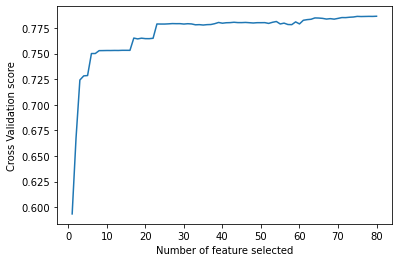

In [10]:
plt.figure()
plt.xlabel('Number of feature selected')
plt.ylabel('Cross Validation score')
plt.plot(range(1,len(rfecv.grid_scores_)+1),rfecv.grid_scores_)
plt.show()

In [ ]:
# Warpper

In [86]:
from sklearn.metrics import make_scorer
def custom_FDR(y_true, y_scores):
    res_df = pd.DataFrame({'score':y_scores,'label': y_true}).sort_values(by='score',ascending=False)
    top3_res1 = res_df.head(round(y_true.shape[0]*0.03))
    return (top3_res1['label'].sum()/sum(y_true))

my_fdr_metric = make_scorer(custom_FDR, greater_is_better=True,needs_proba = True)

In [87]:
start_time = pd.datetime.now()
print("started at ",start_time)

log_reg = LogisticRegression()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfecv_logreg = RFECV(estimator=log_reg, step=1, cv=StratifiedKFold(2),min_features_to_select=30,
              scoring=my_fdr_metric,n_jobs=-1)
rfecv_logreg.fit(X_data, Y_labels)
print('duration: ', pd.datetime.now() - start_time)

print("Number of features chosen: %d" % rfecv_logreg.n_features_)

<ipython-input-87-0f486b0d9738>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


started at  2021-03-16 21:34:15.396180


D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result

duration:  0:24:01.764208
Number of features chosen: 43


In [105]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv_logreg.ranking_), X_data)),
                            columns = ['ranking', 'variable'])
#var_selected.to_csv('fs_logreg_ranks.csv')

scores_csv = pd.DataFrame(rfecv_logreg.grid_scores_,columns = ['Score'])
#scores_csv.to_csv('fs_logreg_scores.csv')

features_chosen_wrapper = X_data.columns[rfecv_logreg.support_].values
print(features_chosen_wrapper)

['fulladdress_count_30' 'address_count_30' 'fulladdress_count_0_by_14'
 'fulladdress_count_3' 'address_count_3' 'address_count_0_by_7'
 'fulladdress_count_0_by_7' 'address_count_1' 'fulladdress_count_1'
 'fulladdress_homephone_count_30' 'ssn_dob_count_30' 'name_dob_count_30'
 'ssn_count_30' 'fulladdress_count_0_by_3' 'address_count_0_by_3'
 'ssn_name_dob_count_30' 'ssn_firstname_count_30' 'ssn_lastname_count_30'
 'ssn_name_count_30' 'name_dob_count_14' 'ssn_dob_count_14'
 'ssn_name_dob_count_14' 'ssn_firstname_count_14' 'ssn_lastname_count_14'
 'ssn_name_count_14' 'ssn_dob_count_0_by_30' 'ssn_name_dob_count_0_by_30'
 'fulladdress_homephone_count_7' 'name_dob_count_0_by_14'
 'name_dob_count_7' 'ssn_dob_count_0_by_14' 'ssn_dob_count_7'
 'ssn_count_7' 'ssn_count_0_by_30' 'ssn_firstname_count_7'
 'ssn_name_dob_count_0_by_14' 'ssn_name_dob_count_7'
 'ssn_lastname_count_7' 'homephone_count_3' 'ssn_name_count_7'
 'address_count_0' 'address_count_1_by_7' 'fulladdress_count_0']


In [7]:
from sklearn.feature_selection import RFE

start_time = pd.datetime.now()
print("started at ",start_time)

log_reg = LogisticRegression()
# The "accuracy" scoring is proportional to the number of correct
# classifications
rfe_logreg = RFE(estimator=log_reg, step=1, n_features_to_select=1)
rfe_logreg.fit(X_data[features_chosen_wrapper], Y_labels)
end_time = pd.datetime.now()
print('duration: ', end_time - start_time)

<ipython-input-7-d7de54a994a8>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  start_time = pd.datetime.now()


started at  2021-03-15 22:09:20.423276


NameError: name 'features_chosen_wrapper' is not defined

In [ ]:
var_selected = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfecv_logreg.ranking_), X_data)),
                            columns = ['ranking', 'variable'])
# var_selected.to_csv('fs_logreg_ranks.csv')

scores_csv = pd.DataFrame(rfecv_logreg.grid_scores_,columns = ['Score'])
# scores_csv.to_csv('fs_logreg_scores.csv')

features_chosen_wrapper = X_data.columns[rfecv_logreg.support_].values

In [ ]:
var_selected_rfe = pd.DataFrame(sorted(zip(map(lambda x: round(x), rfe_logreg.ranking_), X_data[features_chosen_wrapper])),
                            columns = ['ranking', 'variable'])
# var_selected_rfe.to_csv('fs_logreg_ranks91.csv')

#---------------------split cell-----------------------------
selected_columns_rfe = X_data[features_chosen_wrapper].columns[rfe_logreg.support_].values

In [2]:
var_selected_rfe=pd.read_csv('fs_logreg_ranks.csv')
df_oot=pd.read_csv('df_oot.csv')
df_modeling=pd.read_csv('df_modeling.csv')

In [3]:
var_selected_rfe
final_wrapper_columns = var_selected_rfe.variable.values[:30]
final_wrapper_columns

array(['address_count_0', 'address_count_0_by_3', 'address_count_0_by_7',
       'address_count_1', 'address_count_1_by_7', 'address_count_3',
       'address_count_30', 'fulladdress_count_0',
       'fulladdress_count_0_by_14', 'fulladdress_count_0_by_3',
       'fulladdress_count_0_by_7', 'fulladdress_count_1',
       'fulladdress_count_3', 'fulladdress_count_30',
       'fulladdress_homephone_count_30', 'fulladdress_homephone_count_7',
       'homephone_count_3', 'name_dob_count_0_by_14', 'name_dob_count_14',
       'name_dob_count_30', 'name_dob_count_7', 'ssn_count_0_by_30',
       'ssn_count_30', 'ssn_count_7', 'ssn_dob_count_0_by_14',
       'ssn_dob_count_0_by_30', 'ssn_dob_count_14', 'ssn_dob_count_30',
       'ssn_dob_count_7', 'ssn_firstname_count_14'], dtype=object)

In [4]:
X_models = df_modeling[final_wrapper_columns] # training set
Y_labels = df_modeling['fraud_label'] #labels
X_oot = df_oot[final_wrapper_columns] #OOT set
Y_oot = df_oot['fraud_label']

In [41]:
Y_labels['fraud_label']

KeyError: 'fraud_label'

In [68]:
#logistic regression

In [5]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression

In [5]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X_models,Y_labels,train_size=0.7,test_size=0.3)

In [62]:
from sklearn.linear_model import LogisticRegressionCV

clf = LogisticRegressionCV(cv=10,Cs=[0.01],max_iter=1000).fit(X_train, y_train)
#get model accuracy on TRN
clf.score(X_train, y_train)

0.9904096518040528

In [56]:
clf.predict(X_train).sum()

ValueError: X has 32 features per sample; expecting 30

In [55]:
clf.score(X_train, y_train)
prob1 = clf.predict_proba(X_train)
p1 = prob1[:,1]
df_train = X_train
df_train['prob'] = p1
df_train['org'] = y_train
df_train.sort_values(by=['prob'],ascending = False, inplace = True)
bads1 = df_train[df_train['org'] == 1]
numbads1 = len(bads1)

topRows1 = int(round(len(df_train)*0.03))
temp1 = df_train.head(topRows1)
needed1 = temp1.loc[:,'org']
FDR1 = clf.predict(X_train).sum()/numbads1

print('Train FDR is ',FDR1)

<ipython-input-55-4b455f7f6421>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['prob'] = p1
<ipython-input-55-4b455f7f6421>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['org'] = y_train
<ipython-input-55-4b455f7f6421>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.sort_values(by=['prob'],a

ValueError: X has 32 features per sample; expecting 30

In [34]:
clf.score(X_train, y_train)
prob1 = clf.predict_proba(X_train)
p1 = prob1[:,1]
df_train = X_train
df_train['prob'] = p1
df_train['org'] = y_train
df_train.sort_values(by=['prob'],ascending = False, inplace = True)
bads1 = df_train[df_train['org'] == 1]
numbads1 = len(bads1)

topRows1 = int(round(len(df_train)*0.03))
temp1 = df_train.head(topRows1)
needed1 = temp1.loc[:,'org']
FDR1 = sum(needed1)/numbads1

print('Train FDR is ',FDR1)

<ipython-input-34-dc1b72e0b83d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['prob'] = p1
<ipython-input-34-dc1b72e0b83d>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['org'] = y_train


Train FDR is  0.5415844027640672


<ipython-input-34-dc1b72e0b83d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train.sort_values(by=['prob'],ascending = False, inplace = True)


In [13]:
clf.score(X_test, y_test)
prob2 = clf.predict_proba(X_test)
p2 = prob2[:,1]
df_test = X_test
df_test['prob'] = p2
df_test['org'] = y_test
df_test.sort_values(by=['prob'],ascending = False, inplace = True)
df_test.head()
#FDR 3% for TEST
bads2 = df_test[df_test['org'] == 1]
numbads2 = len(bads2)
topRows2 = int(round(len(df_test)*0.03))
temp2 = df_test.head(topRows2)
needed2 = temp2.loc[:,'org']

FDR2 = sum(needed2)/numbads2
print('Test FDR is ',FDR2)

Test FDR is  0.5470723306544202


<ipython-input-13-82b4bfe22627>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['prob'] = p2
<ipython-input-13-82b4bfe22627>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['org'] = y_test
<ipython-input-13-82b4bfe22627>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test.sort_values(by=['prob'],ascen

In [11]:
clf.score(X_oot, Y_oot)
prob3 = clf.predict_proba(X_oot)
# for probabilty in prob3:
    # p3.append(probabilty[1])
p3 =  prob3[:,1]
df_OOT = deepcopy(X_oot)
df_OOT['prob'] = p3
df_OOT['org'] = Y_oot
df_OOT.sort_values(by=['prob'],ascending = False, inplace = True)
df_OOT.head()
bads3 = df_OOT[df_OOT['org'] == 1]
numbads3 = len(bads3)
topRows3 = int(round(len(df_OOT)*0.03))
temp3 = df_OOT.head(topRows3)
needed3 = temp3.loc[:,'org']
FDR3 = sum(needed3)/numbads3

print('OOT FDR is ',FDR3)

OOT FDR is  0.5181236673773987


In [10]:
var_selected=pd.read_csv('var_selected.csv')

In [13]:
final_var=var_selected.iloc[1:31,2]

In [16]:
X_models = df_modeling[final_var] # training set
Y_labels = df_modeling['fraud_label']
X_oot = df_oot[final_var] #OOT set
Y_oot = df_oot['fraud_label']

In [104]:
X_models = X_data[final_wrapper_columns] # training set
Y_labels #labels
X_oot = df_oot[final_wrapper_columns] #OOT set
Y_oot = df_oot['fraud_label']

In [6]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold

In [9]:
X_train,X_test,Y_train,Y_test = train_test_split(X_models,Y_labels,train_size=0.7,test_size = 0.30)

In [33]:
Y_train['fraud_label']

690335    0
569586    0
628995    0
87022     0
118994    0
         ..
92636     0
269323    0
534609    0
469420    0
405099    0
Name: fraud_label, Length: 556497, dtype: int64

In [10]:
random_forest_1 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 100, max_depth=60)
random_forest_1.fit(X_train,Y_train)

RandomForestClassifier(max_depth=60, max_features=7)

In [11]:
random_forest_2 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 100,max_depth=70)
random_forest_2.fit(X_train,Y_train)

RandomForestClassifier(max_depth=70, max_features=7)

In [12]:
random_forest_3 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 100,max_depth=80)
random_forest_3.fit(X_train,Y_train)

RandomForestClassifier(max_depth=80, max_features=7)

In [13]:
random_forest_4 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 200,max_depth=60)
random_forest_4.fit(X_train,Y_train)

RandomForestClassifier(max_depth=60, max_features=7, n_estimators=200)

In [14]:
random_forest_5 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 200,max_depth=70)
random_forest_5.fit(X_train,Y_train)

RandomForestClassifier(max_depth=70, max_features=7, n_estimators=200)

In [15]:
random_forest_6 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 200,max_depth=80)
random_forest_6.fit(X_train,Y_train)

RandomForestClassifier(max_depth=80, max_features=7, n_estimators=200)

In [16]:
random_forest_7 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 300,max_depth=60)
random_forest_7.fit(X_train,Y_train)

RandomForestClassifier(max_depth=60, max_features=7, n_estimators=300)

In [17]:
random_forest_8 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 300,max_depth=70)
random_forest_8.fit(X_train,Y_train)

RandomForestClassifier(max_depth=70, max_features=7, n_estimators=300)

In [18]:
random_forest_9 = RandomForestClassifier(max_features = 7,
                                            n_estimators = 300,max_depth=80)
random_forest_9.fit(X_train,Y_train)

RandomForestClassifier(max_depth=80, max_features=7, n_estimators=300)

In [19]:
def fdr_RF(model,X_data,Y_data):
    Y_data = pd.DataFrame(Y_data)
    Y_data['Fraud Proba'] = model.predict_proba(X_data)[:,1].tolist()
    Y_data = Y_data.sort_values(by='Fraud Proba',ascending=False)
    total_bads = Y_data['fraud_label'][Y_data['fraud_label']==1].count()
    top_rows = int(len(X_data)*.03)
    sum_bads = Y_data['fraud_label'].head(top_rows)[Y_data['fraud_label']==1].count()
    fdr = sum_bads/total_bads
    return fdr*100

In [20]:
time_results = pd.datetime.now()
results_dict_RF = {}
for i in range(1,10):
    curr_time = pd.datetime.now()
    model_name = "random_forest_"+str(i)
    results_dict_RF[model_name] = {'fdr':{}}
    
    # calculate fdr for training, testing, and validation sets
    results_dict_RF[model_name]['fdr']['train_fdr_30']=fdr_RF(vars()[model_name],X_train,Y_train)
    results_dict_RF[model_name]['fdr']['test_fdr_30']=fdr_RF(vars()[model_name],X_test,Y_test)
    results_dict_RF[model_name]['fdr']['oot_fdr_30']=fdr_RF(vars()[model_name],X_oot,Y_oot)
    
    print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
    
print("DONE!", pd.datetime.now()-time_results)

<ipython-input-20-be67e07e4e7a>:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  time_results = pd.datetime.now()
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()
<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


Done with: random_forest_1 ;  time: 0:00:11.161531


<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


Done with: random_forest_2 ;  time: 0:00:10.721454


<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


Done with: random_forest_3 ;  time: 0:00:10.934491


<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


Done with: random_forest_4 ;  time: 0:00:21.562894


<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


Done with: random_forest_5 ;  time: 0:00:21.586929


<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


Done with: random_forest_6 ;  time: 0:00:21.511436


<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


Done with: random_forest_7 ;  time: 0:00:32.047170


<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  curr_time = pd.datetime.now()


Done with: random_forest_8 ;  time: 0:00:31.574203
Done with: random_forest_9 ;  time: 0:00:31.910265
DONE! 0:03:13.013373


<ipython-input-20-be67e07e4e7a>:13: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("Done with:",model_name, ";  time:",pd.datetime.now()-curr_time)
<ipython-input-20-be67e07e4e7a>:15: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  print("DONE!", pd.datetime.now()-time_results)


In [21]:
results_dict_RF

{'random_forest_1': {'fdr': {'train_fdr_30': 56.711199900112376,
   'test_fdr_30': 55.30629853321829,
   'oot_fdr_30': 53.5181236673774}},
 'random_forest_2': {'fdr': {'train_fdr_30': 56.76114371332252,
   'test_fdr_30': 55.277538107564,
   'oot_fdr_30': 53.5181236673774}},
 'random_forest_3': {'fdr': {'train_fdr_30': 56.711199900112376,
   'test_fdr_30': 55.30629853321829,
   'oot_fdr_30': 53.60341151385928}},
 'random_forest_4': {'fdr': {'train_fdr_30': 56.6862279935073,
   'test_fdr_30': 55.335058958872594,
   'oot_fdr_30': 53.688699360341154}},
 'random_forest_5': {'fdr': {'train_fdr_30': 56.73617180671744,
   'test_fdr_30': 55.24877768190969,
   'oot_fdr_30': 53.60341151385928}},
 'random_forest_6': {'fdr': {'train_fdr_30': 56.723685853414906,
   'test_fdr_30': 55.335058958872594,
   'oot_fdr_30': 53.5181236673774}},
 'random_forest_7': {'fdr': {'train_fdr_30': 56.69871394680984,
   'test_fdr_30': 55.30629853321829,
   'oot_fdr_30': 53.688699360341154}},
 'random_forest_8': {'fdr'

In [22]:

my_list = [results_dict_RF]
my_list

[{'random_forest_1': {'fdr': {'train_fdr_30': 56.711199900112376,
    'test_fdr_30': 55.30629853321829,
    'oot_fdr_30': 53.5181236673774}},
  'random_forest_2': {'fdr': {'train_fdr_30': 56.76114371332252,
    'test_fdr_30': 55.277538107564,
    'oot_fdr_30': 53.5181236673774}},
  'random_forest_3': {'fdr': {'train_fdr_30': 56.711199900112376,
    'test_fdr_30': 55.30629853321829,
    'oot_fdr_30': 53.60341151385928}},
  'random_forest_4': {'fdr': {'train_fdr_30': 56.6862279935073,
    'test_fdr_30': 55.335058958872594,
    'oot_fdr_30': 53.688699360341154}},
  'random_forest_5': {'fdr': {'train_fdr_30': 56.73617180671744,
    'test_fdr_30': 55.24877768190969,
    'oot_fdr_30': 53.60341151385928}},
  'random_forest_6': {'fdr': {'train_fdr_30': 56.723685853414906,
    'test_fdr_30': 55.335058958872594,
    'oot_fdr_30': 53.5181236673774}},
  'random_forest_7': {'fdr': {'train_fdr_30': 56.69871394680984,
    'test_fdr_30': 55.30629853321829,
    'oot_fdr_30': 53.688699360341154}},
  'ra

In [23]:
for k,v in results_dict_RF.items():
  maximum_key = max(results_dict_RF, key=lambda v: results_dict_RF[v]['fdr']['test_fdr_30'])
vars()[maximum_key] 

RandomForestClassifier(max_depth=60, max_features=7, n_estimators=200)

In [90]:
def output_table(y_res_valid,Y_valid):
# returs the output tables
# y_res_valis is y_pred
# Y_valid is y_true
# returns:
# cumulative dataset, Bin Statistics
    no_of_bads =Y_valid.sum()
    no_of_records = len(Y_valid)
    no_of_goods = no_of_records - no_of_bads
    print('no_of_records',no_of_records)
    print('No of bads',no_of_bads)
    print('no_of_goods',no_of_goods)

    fin_tabl_df = pd.DataFrame({'score':y_res_valid,'label': Y_valid}).sort_values(by='score',ascending=False)
    df_pres_cum = pd.DataFrame(columns=['Total # Records','# Goods','# Bads'])
    for i_tbl_df in range(1,21): #21 is the final
    #     print(i_tbl_df)
        top3_res2 = fin_tabl_df.head(round(Y_valid.shape[0]*(i_tbl_df/100)))
        top3_res2#['label'].sum()/sum(Y_valid)
    #     print('No of records:',top3_res2.shape[0])
        df_pres_cum.loc[i_tbl_df-1,'Total # Records'] = top3_res2.shape[0]
    #     print('No of bads:',top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Bads'] = top3_res2['label'].sum()
    #     print('No of goods:',top3_res2.shape[0]- top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Goods'] = top3_res2.shape[0]- top3_res2['label'].sum()

    df_pres = df_pres_cum.diff()
    df_pres.loc[0] = df_pres_cum.loc[0]
    df_pres = df_pres.rename(columns={"Total # Records": "# Records"})
    df_pres['% Goods'] = 100*(df_pres['# Goods']/df_pres['# Records'])
    df_pres['% Bads'] = 100*(df_pres['# Bads']/df_pres['# Records'])
    print('Bin statistics')
    df_pres.to_csv('Test_Bin_stats.csv')
    display(df_pres)

    df_pres_cum['% Goods'] = 100*(df_pres_cum['# Goods']/no_of_goods)
    df_pres_cum['% Bads'] = 100*(df_pres_cum['# Bads']/no_of_bads)
    df_pres_cum['KS'] = df_pres_cum['% Bads'] - df_pres_cum['% Goods']
    df_pres_cum['FPR'] = df_pres_cum['# Goods']/df_pres_cum['# Bads']
    df_pres_cum = df_pres_cum.rename(columns={"# Goods": "Cumulative Goods",'# Bads':'Cumulative Bads','% Bads':'% Bads (FDR)'})
    print('Cumulative results')
    df_pres_cum.to_csv('Test_Cum_stats.csv') 
    display(df_pres_cum)
    return df_pres_cum, df_pres

In [78]:
# Concatenating Fraud probability fitted with the best model with actual fraud label for calculating bin statistics
Y_train['Fraud Proba'] =  vars()[maximum_key].predict_proba(X_train)[:,1].tolist()
Y_test['Fraud Proba'] =  vars()[maximum_key].predict_proba(X_test)[:,1].tolist()
Y_oot['Fraud Proba'] =  vars()[maximum_key].predict_proba(X_oot)[:,1].tolist()

In [86]:
Y_train.iloc[:-1].sum()

7993

690335                                                         0
569586                                                         0
628995                                                         0
87022                                                          0
118994                                                         0
                                     ...                        
269323                                                         0
534609                                                         0
469420                                                         0
405099                                                         0
Fraud Proba    [0.006507612904099281, 0.006329470413251576, 0...
Name: fraud_label, Length: 556498, dtype: object

In [91]:
# Training Set
output_table(Y_train['Fraud Proba'],Y_train.iloc[:-1])

no_of_records 556497
No of bads 7993
no_of_goods 548504
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,5565,1310,4255,23.54,76.46
1,5565,5409,156,97.1968,2.80323
2,5565,5484,81,98.5445,1.45553
3,5565,5521,44,99.2093,0.790656
4,5565,5517,48,99.1375,0.862534
5,5565,5517,48,99.1375,0.862534
6,5565,5512,53,99.0476,0.952381
7,5565,5528,37,99.3351,0.66487
8,5565,5503,62,98.8859,1.11411
9,5565,5532,33,99.407,0.592992


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,5565,1310,4255,0.238831,53.2341,52.9952,0.307873
1,11130,6719,4411,1.22497,55.1858,53.9608,1.52324
2,16695,12203,4492,2.22478,56.1992,53.9744,2.71661
3,22260,17724,4536,3.23133,56.7497,53.5183,3.90741
4,27825,23241,4584,4.23716,57.3502,53.113,5.07003
5,33390,28758,4632,5.24299,57.9507,52.7077,6.20855
6,38955,34270,4685,6.2479,58.6138,52.3659,7.31483
7,44520,39798,4722,7.25574,59.0767,51.821,8.42821
8,50085,45301,4784,8.25901,59.8524,51.5934,9.46927
9,55650,50833,4817,9.26757,60.2652,50.9977,10.5528


(   Total # Records Cumulative Goods Cumulative Bads   % Goods % Bads (FDR)       KS       FPR
 0             5565             1310            4255  0.238831      53.2341  52.9952  0.307873
 1            11130             6719            4411   1.22497      55.1858  53.9608   1.52324
 2            16695            12203            4492   2.22478      56.1992  53.9744   2.71661
 3            22260            17724            4536   3.23133      56.7497  53.5183   3.90741
 4            27825            23241            4584   4.23716      57.3502   53.113   5.07003
 5            33390            28758            4632   5.24299      57.9507  52.7077   6.20855
 6            38955            34270            4685    6.2479      58.6138  52.3659   7.31483
 7            44520            39798            4722   7.25574      59.0767   51.821   8.42821
 8            50085            45301            4784   8.25901      59.8524  51.5934   9.46927
 9            55650            50833            48

In [93]:
# Testing Set
output_table(Y_test['Fraud Proba'],Y_test.iloc[:-1])

no_of_records 238499
No of bads 3493
no_of_goods 235006
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,2385,507,1878,21.2579,78.7421
1,2385,2308,77,96.7715,3.22851
2,2385,2355,30,98.7421,1.25786
3,2385,2368,17,99.2872,0.712788
4,2385,2368,17,99.2872,0.712788
5,2385,2361,24,98.9937,1.00629
6,2385,2370,15,99.3711,0.628931
7,2385,2367,18,99.2453,0.754717
8,2385,2366,19,99.2034,0.796646
9,2385,2372,13,99.4549,0.545073


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,2385,507,1878,0.215739,53.7647,53.5489,0.269968
1,4770,2815,1955,1.19784,55.9691,54.7712,1.4399
2,7155,5170,1985,2.19994,56.8279,54.628,2.60453
3,9540,7538,2002,3.20758,57.3146,54.1071,3.76523
4,11925,9906,2019,4.21521,57.8013,53.5861,4.90639
5,14310,12267,2043,5.21987,58.4884,53.2685,6.00441
6,16695,14637,2058,6.22835,58.9178,52.6895,7.11224
7,19080,17004,2076,7.23556,59.4332,52.1976,8.19075
8,21465,19370,2095,8.24234,59.9771,51.7348,9.24582
9,23850,21742,2108,9.25168,60.3493,51.0976,10.314


(   Total # Records Cumulative Goods Cumulative Bads   % Goods % Bads (FDR)       KS       FPR
 0             2385              507            1878  0.215739      53.7647  53.5489  0.269968
 1             4770             2815            1955   1.19784      55.9691  54.7712    1.4399
 2             7155             5170            1985   2.19994      56.8279   54.628   2.60453
 3             9540             7538            2002   3.20758      57.3146  54.1071   3.76523
 4            11925             9906            2019   4.21521      57.8013  53.5861   4.90639
 5            14310            12267            2043   5.21987      58.4884  53.2685   6.00441
 6            16695            14637            2058   6.22835      58.9178  52.6895   7.11224
 7            19080            17004            2076   7.23556      59.4332  52.1976   8.19075
 8            21465            19370            2095   8.24234      59.9771  51.7348   9.24582
 9            23850            21742            21

In [95]:
# Validation Set
output_table(Y_oot['Fraud Proba'],Y_oot.iloc[:-1])

no_of_records 163772
No of bads 2345
no_of_goods 161427
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,1638,448,1190,27.3504,72.6496
1,1637,1592,45,97.2511,2.74893
2,1638,1614,24,98.5348,1.4652
3,1638,1623,15,99.0842,0.915751
4,1638,1626,12,99.2674,0.732601
5,1637,1624,13,99.2059,0.794136
6,1638,1618,20,98.779,1.221
7,1638,1618,20,98.779,1.221
8,1637,1628,9,99.4502,0.549786
9,1638,1623,15,99.0842,0.915751


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,1638,448,1190,0.277525,50.7463,50.4687,0.376471
1,3275,2040,1235,1.26373,52.6652,51.4015,1.65182
2,4913,3654,1259,2.26356,53.6887,51.4251,2.9023
3,6551,5277,1274,3.26897,54.3284,51.0594,4.14207
4,8189,6903,1286,4.27624,54.8401,50.5638,5.36781
5,9826,8527,1299,5.28226,55.3945,50.1122,6.56428
6,11464,10145,1319,6.28457,56.2473,49.9628,7.69143
7,13102,11763,1339,7.28689,57.1002,49.8133,8.78491
8,14739,13391,1348,8.29539,57.484,49.1886,9.93398
9,16377,15014,1363,9.3008,58.1237,48.8229,11.0154


(   Total # Records Cumulative Goods Cumulative Bads   % Goods % Bads (FDR)       KS       FPR
 0             1638              448            1190  0.277525      50.7463  50.4687  0.376471
 1             3275             2040            1235   1.26373      52.6652  51.4015   1.65182
 2             4913             3654            1259   2.26356      53.6887  51.4251    2.9023
 3             6551             5277            1274   3.26897      54.3284  51.0594   4.14207
 4             8189             6903            1286   4.27624      54.8401  50.5638   5.36781
 5             9826             8527            1299   5.28226      55.3945  50.1122   6.56428
 6            11464            10145            1319   6.28457      56.2473  49.9628   7.69143
 7            13102            11763            1339   7.28689      57.1002  49.8133   8.78491
 8            14739            13391            1348   8.29539       57.484  49.1886   9.93398
 9            16377            15014            13

In [13]:
#Neural Work
import keras.backend as K
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam


Using TensorFlow backend.
D:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\anaconda\envs\py37\lib\site-packages\tensorflow\python\framework\dtypes.py:519: Future

In [10]:
#  function to compute FDR 
def get_FDR(y_scores, y_true):
    res_df = pd.DataFrame({'score':y_scores,'label': y_true}).sort_values(by='score',ascending=False)
    top3_res1 = res_df.head(round(y_true.shape[0]*0.03))
    top3_res2 = res_df.tail(round(y_true.shape[0]*0.03))
#     return np.maximum((top3_res1['label'].sum()/sum(y_true)),(top3_res1['label'].sum()/sum(y_true)))
    return (top3_res1['label'].sum()/sum(y_true))

In [11]:

def recall_m(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    all_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    
    recall = true_positives / (all_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    y_true = K.ones_like(y_true) 
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [35]:
num_hidden = 30 # number of nodes in hidden layer
adam_par = Adam(learning_rate= 0.01, beta_1=0.9, beta_2=0.999, amsgrad=False) # adam algorithm parameters


model = Sequential()
model.add(Dense(num_hidden, input_dim=X_models.shape[1], activation='relu'))
# uncomment to add extra hidden layers
# model.add(Dense(20, input_dim=12, activation='relu'))
# model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, precision_m, recall_m, tf.keras.metrics.AUC()])


In [36]:
no_of_epochs = 10
batch = 1000 # assign batch size in training
class_weights = {0: 0.5, 1: 8.5} # assign class weight
start_time = pd.datetime.now()
history = model.fit(x=X_models, y=Y_labels, batch_size = batch,class_weight = class_weights, epochs = no_of_epochs, validation_split = 0.3)
print('duration: ', pd.datetime.now() - start_time)

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  after removing the cwd from sys.path.


Train on 556497 samples, validate on 238499 samples
Epoch 1/10
556497/556497 [==============================] - 3s 5us/step - loss: 0.2093 - accuracy: 0.9784 - f1_score: 0.0403 - precision_m: 1.0000 - recall_m: 0.0206 - auc_3: 0.7349 - val_loss: 0.2048 - val_accuracy: 0.9784 - val_f1_score: 0.0418 - val_precision_m: 1.0000 - val_recall_m: 0.0214 - val_auc_3: 0.7652
Epoch 2/10
556497/556497 [==============================] - 3s 5us/step - loss: 0.1990 - accuracy: 0.9798 - f1_score: 0.0396 - precision_m: 1.0000 - recall_m: 0.0202 - auc_3: 0.7682 - val_loss: 0.2005 - val_accuracy: 0.9840 - val_f1_score: 0.0323 - val_precision_m: 1.0000 - val_recall_m: 0.0165 - val_auc_3: 0.7700
Epoch 3/10
556497/556497 [==============================] - 3s 5us/step - loss: 0.1957 - accuracy: 0.9863 - f1_score: 0.0276 - precision_m: 1.0000 - recall_m: 0.0140 - auc_3: 0.7720 - val_loss: 0.1981 - val_accuracy: 0.9878 - val_f1_score: 0.0251 - val_precision_m: 1.0000 - val_recall_m: 0.0128 - val_auc_3: 0.7726


D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  


In [37]:
clas_pred_train = model.predict(X_train) # get class scores
clas_pred_test = model.predict(X_test) # get class scores
clas_pred_OOT =  model.predict(X_oot) # get class scores
print('Train FDR @ 3% is',get_FDR(np.squeeze(clas_pred_train),y_train))
print('Test FDR @ 3% is',get_FDR(np.squeeze(clas_pred_test),y_test))
print('OOT FDR is:',get_FDR(np.squeeze(clas_pred_OOT),Y_oot))

Train FDR @ 3% is 0.5508338480543545
Test FDR @ 3% is 0.5538189324682984
OOT FDR is: 0.529637526652452


In [29]:
num_hidden = 30 # number of nodes in hidden layer
adam_par = Adam(learning_rate= 0.01, beta_1=0.9, beta_2=0.999, amsgrad=False) # adam algorithm parameters


model = Sequential()
model.add(Dense(num_hidden, input_dim=X_train.shape[1], activation='relu'))
# uncomment to add extra hidden layers
# model.add(Dense(20, input_dim=12, activation='relu'))
# model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, precision_m, recall_m, tf.keras.metrics.AUC()])
no_of_epochs = 20
batch = 1000 # assign batch size in training
class_weights = {0: 0.5, 1: 8.5} # assign class weight
start_time = pd.datetime.now()
history = model.fit(x=X_models, y=Y_labels, batch_size = batch,class_weight = class_weights, epochs = no_of_epochs, validation_split = 0.3)
print('duration: ', pd.datetime.now() - start_time)

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train on 556497 samples, validate on 238499 samples
Epoch 1/20
556497/556497 [==============================] - 3s 5us/step - loss: 0.3050 - accuracy: 0.9372 - f1_score: 0.0793 - precision_m: 0.9928 - recall_m: 0.0620 - auc_2: 0.6642 - val_loss: 0.2060 - val_accuracy: 0.9794 - val_f1_score: 0.0401 - val_precision_m: 1.0000 - val_recall_m: 0.0205 - val_auc_2: 0.7506
Epoch 2/20
556497/556497 [==============================] - 3s 5us/step - loss: 0.1999 - accuracy: 0.9799 - f1_score: 0.0391 - precision_m: 1.0000 - recall_m: 0.0200 - auc_2: 0.7606 - val_loss: 0.2034 - val_accuracy: 0.9789 - val_f1_score: 0.0424 - val_precision_m: 1.0000 - val_recall_m: 0.0217 - val_auc_2: 0.7648
Epoch 3/20
556497/556497 [==============================] - 3s 5us/step - loss: 0.1978 - accuracy: 0.9825 - f1_score: 0.0348 - precision_m: 1.0000 - recall_m: 0.0177 - auc_2: 0.7676 - val_loss: 0.2017 - val_accuracy: 0.9845 - val_f1_score: 0.0309 - val_precision_m: 1.0000 - val_recall_m: 0.0157 - val_auc_2: 0.7681


D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [34]:
clas_pred_train = model.predict(X_train) # get class scores
clas_pred_test = model.predict(X_test) # get class scores
clas_pred_OOT =  model.predict(X_oot) # get class scores
print('Train FDR @ 3% is',get_FDR(np.squeeze(clas_pred_train),y_train))
print('Test FDR @ 3% is',get_FDR(np.squeeze(clas_pred_test),y_test))
print('OOT FDR is:',get_FDR(np.squeeze(clas_pred_OOT),Y_oot))

Train FDR @ 3% is 0.5565163681284744
Test FDR @ 3% is 0.5635505750516072
OOT FDR is: 0.5343283582089552


In [38]:
num_hidden = 30 # number of nodes in hidden layer
adam_par = Adam(learning_rate= 0.01, beta_1=0.9, beta_2=0.999, amsgrad=False) # adam algorithm parameters


model = Sequential()
model.add(Dense(num_hidden, input_dim=X_train.shape[1], activation='relu'))
# uncomment to add extra hidden layers
# model.add(Dense(20, input_dim=12, activation='relu'))
# model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, precision_m, recall_m, tf.keras.metrics.AUC()])
no_of_epochs = 30
batch = 1000 # assign batch size in training
class_weights = {0: 0.5, 1: 8.5} # assign class weight
start_time = pd.datetime.now()
history = model.fit(x=X_models, y=Y_labels, batch_size = batch,class_weight = class_weights, epochs = no_of_epochs, validation_split = 0.3)
print('duration: ', pd.datetime.now() - start_time)
clas_pred_train = model.predict(X_train) # get class scores
clas_pred_test = model.predict(X_test) # get class scores
clas_pred_OOT =  model.predict(X_oot) # get class scores
print('Train FDR @ 3% is',get_FDR(np.squeeze(clas_pred_train),y_train))
print('Test FDR @ 3% is',get_FDR(np.squeeze(clas_pred_test),y_test))
print('OOT FDR is:',get_FDR(np.squeeze(clas_pred_OOT),Y_oot))

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train on 556497 samples, validate on 238499 samples
Epoch 1/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.3241 - accuracy: 0.9477 - f1_score: 0.0663 - precision_m: 1.0000 - recall_m: 0.0521 - auc_4: 0.6818 - val_loss: 0.2059 - val_accuracy: 0.9825 - val_f1_score: 0.0352 - val_precision_m: 1.0000 - val_recall_m: 0.0179 - val_auc_4: 0.7548
Epoch 2/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1981 - accuracy: 0.9846 - f1_score: 0.0306 - precision_m: 1.0000 - recall_m: 0.0155 - auc_4: 0.7638 - val_loss: 0.2020 - val_accuracy: 0.9851 - val_f1_score: 0.0297 - val_precision_m: 1.0000 - val_recall_m: 0.0151 - val_auc_4: 0.7675
Epoch 3/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1978 - accuracy: 0.9852 - f1_score: 0.0295 - precision_m: 1.0000 - recall_m: 0.0150 - auc_4: 0.7695 - val_loss: 0.1999 - val_accuracy: 0.9871 - val_f1_score: 0.0255 - val_precision_m: 1.0000 - val_recall_m: 0.0129 - val_auc_4: 0.7705


Epoch 27/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1899 - accuracy: 0.9902 - f1_score: 0.0210 - precision_m: 1.0000 - recall_m: 0.0106 - auc_4: 0.7765 - val_loss: 0.1930 - val_accuracy: 0.9900 - val_f1_score: 0.0218 - val_precision_m: 0.9958 - val_recall_m: 0.0111 - val_auc_4: 0.7765
Epoch 28/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1888 - accuracy: 0.9903 - f1_score: 0.0208 - precision_m: 1.0000 - recall_m: 0.0105 - auc_4: 0.7765 - val_loss: 0.1946 - val_accuracy: 0.9899 - val_f1_score: 0.0220 - val_precision_m: 1.0000 - val_recall_m: 0.0111 - val_auc_4: 0.7765
Epoch 29/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1889 - accuracy: 0.9902 - f1_score: 0.0210 - precision_m: 1.0000 - recall_m: 0.0106 - auc_4: 0.7765 - val_loss: 0.1945 - val_accuracy: 0.9903 - val_f1_score: 0.0209 - val_precision_m: 0.9958 - val_recall_m: 0.0106 - val_auc_4: 0.7765
Epoch 30/30
556497/556497 [======================

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train FDR @ 3% is 0.55775169857937
Test FDR @ 3% is 0.5653199646122088
OOT FDR is: 0.5326226012793177


In [39]:
num_hidden = 10 # number of nodes in hidden layer
adam_par = Adam(learning_rate= 0.01, beta_1=0.9, beta_2=0.999, amsgrad=False) # adam algorithm parameters


model = Sequential()
model.add(Dense(num_hidden, input_dim=X_train.shape[1], activation='relu'))
# uncomment to add extra hidden layers
# model.add(Dense(20, input_dim=12, activation='relu'))
# model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, precision_m, recall_m, tf.keras.metrics.AUC()])
no_of_epochs = 10
batch = 1000 # assign batch size in training
class_weights = {0: 0.5, 1: 8.5} # assign class weight
start_time = pd.datetime.now()
history = model.fit(x=X_models, y=Y_labels, batch_size = batch,class_weight = class_weights, epochs = no_of_epochs, validation_split = 0.3)
print('duration: ', pd.datetime.now() - start_time)
clas_pred_train = model.predict(X_train) # get class scores
clas_pred_test = model.predict(X_test) # get class scores
clas_pred_OOT =  model.predict(X_oot) # get class scores
print('Train FDR @ 3% is',get_FDR(np.squeeze(clas_pred_train),y_train))
print('Test FDR @ 3% is',get_FDR(np.squeeze(clas_pred_test),y_test))
print('OOT FDR is:',get_FDR(np.squeeze(clas_pred_OOT),Y_oot))

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train on 556497 samples, validate on 238499 samples
Epoch 1/10
556497/556497 [==============================] - 3s 5us/step - loss: 0.2418 - accuracy: 0.9744 - f1_score: 0.0456 - precision_m: 1.0000 - recall_m: 0.0233 - auc_5: 0.6493 - val_loss: 0.2105 - val_accuracy: 0.9719 - val_f1_score: 0.0542 - val_precision_m: 1.0000 - val_recall_m: 0.0279 - val_auc_5: 0.7356
Epoch 2/10
556497/556497 [==============================] - 3s 5us/step - loss: 0.2019 - accuracy: 0.9797 - f1_score: 0.0391 - precision_m: 1.0000 - recall_m: 0.0200 - auc_5: 0.7505 - val_loss: 0.2060 - val_accuracy: 0.9866 - val_f1_score: 0.0257 - val_precision_m: 1.0000 - val_recall_m: 0.0131 - val_auc_5: 0.7561
Epoch 3/10
556497/556497 [==============================] - 3s 5us/step - loss: 0.1978 - accuracy: 0.9867 - f1_score: 0.0262 - precision_m: 1.0000 - recall_m: 0.0133 - auc_5: 0.7606 - val_loss: 0.2020 - val_accuracy: 0.9872 - val_f1_score: 0.0254 - val_precision_m: 1.0000 - val_recall_m: 0.0129 - val_auc_5: 0.7628


D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train FDR @ 3% is 0.5486102532427425
Test FDR @ 3% is 0.5561781185491006
OOT FDR is: 0.520682302771855


In [40]:
num_hidden = 10 # number of nodes in hidden layer
adam_par = Adam(learning_rate= 0.01, beta_1=0.9, beta_2=0.999, amsgrad=False) # adam algorithm parameters


model = Sequential()
model.add(Dense(num_hidden, input_dim=X_train.shape[1], activation='relu'))
# uncomment to add extra hidden layers
# model.add(Dense(20, input_dim=12, activation='relu'))
# model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, precision_m, recall_m, tf.keras.metrics.AUC()])
no_of_epochs = 20
batch = 1000 # assign batch size in training
class_weights = {0: 0.5, 1: 8.5} # assign class weight
start_time = pd.datetime.now()
history = model.fit(x=X_models, y=Y_labels, batch_size = batch,class_weight = class_weights, epochs = no_of_epochs, validation_split = 0.3)
print('duration: ', pd.datetime.now() - start_time)
clas_pred_train = model.predict(X_train) # get class scores
clas_pred_test = model.predict(X_test) # get class scores
clas_pred_OOT =  model.predict(X_oot) # get class scores
print('Train FDR @ 3% is',get_FDR(np.squeeze(clas_pred_train),y_train))
print('Test FDR @ 3% is',get_FDR(np.squeeze(clas_pred_test),y_test))
print('OOT FDR is:',get_FDR(np.squeeze(clas_pred_OOT),Y_oot))

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train on 556497 samples, validate on 238499 samples
Epoch 1/20
556497/556497 [==============================] - 3s 6us/step - loss: 0.2090 - accuracy: 0.9811 - f1_score: 0.0351 - precision_m: 0.9856 - recall_m: 0.0179 - auc_6: 0.7641 - val_loss: 0.2062 - val_accuracy: 0.9786 - val_f1_score: 0.0419 - val_precision_m: 1.0000 - val_recall_m: 0.0214 - val_auc_6: 0.7725
Epoch 2/20
556497/556497 [==============================] - 3s 5us/step - loss: 0.2010 - accuracy: 0.9789 - f1_score: 0.0416 - precision_m: 1.0000 - recall_m: 0.0213 - auc_6: 0.7749 - val_loss: 0.2048 - val_accuracy: 0.9785 - val_f1_score: 0.0427 - val_precision_m: 1.0000 - val_recall_m: 0.0218 - val_auc_6: 0.7757
Epoch 3/20
556497/556497 [==============================] - 3s 5us/step - loss: 0.1999 - accuracy: 0.9789 - f1_score: 0.0420 - precision_m: 1.0000 - recall_m: 0.0215 - auc_6: 0.7762 - val_loss: 0.2060 - val_accuracy: 0.9788 - val_f1_score: 0.0419 - val_precision_m: 1.0000 - val_recall_m: 0.0214 - val_auc_6: 0.7761


D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train FDR @ 3% is 0.548733786287832
Test FDR @ 3% is 0.548805662046594
OOT FDR is: 0.5232409381663113


In [41]:
num_hidden = 10 # number of nodes in hidden layer
adam_par = Adam(learning_rate= 0.01, beta_1=0.9, beta_2=0.999, amsgrad=False) # adam algorithm parameters


model = Sequential()
model.add(Dense(num_hidden, input_dim=X_train.shape[1], activation='relu'))
# uncomment to add extra hidden layers
# model.add(Dense(20, input_dim=12, activation='relu'))
# model.add(Dense(15, input_dim=30, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# Compile model
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy']) 
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy', f1_score, precision_m, recall_m, tf.keras.metrics.AUC()])
no_of_epochs = 30
batch = 1000 # assign batch size in training
class_weights = {0: 0.5, 1: 8.5} # assign class weight
start_time = pd.datetime.now()
history = model.fit(x=X_models, y=Y_labels, batch_size = batch,class_weight = class_weights, epochs = no_of_epochs, validation_split = 0.3)
print('duration: ', pd.datetime.now() - start_time)
clas_pred_train = model.predict(X_train) # get class scores
clas_pred_test = model.predict(X_test) # get class scores
clas_pred_OOT =  model.predict(X_oot) # get class scores
print('Train FDR @ 3% is',get_FDR(np.squeeze(clas_pred_train),y_train))
print('Test FDR @ 3% is',get_FDR(np.squeeze(clas_pred_test),y_test))
print('OOT FDR is:',get_FDR(np.squeeze(clas_pred_OOT),Y_oot))

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train on 556497 samples, validate on 238499 samples
Epoch 1/30
556497/556497 [==============================] - 3s 6us/step - loss: 0.2750 - accuracy: 0.9669 - f1_score: 0.0614 - precision_m: 0.9659 - recall_m: 0.0318 - auc_7: 0.6893 - val_loss: 0.2098 - val_accuracy: 0.9651 - val_f1_score: 0.0680 - val_precision_m: 1.0000 - val_recall_m: 0.0352 - val_auc_7: 0.7435
Epoch 2/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.2016 - accuracy: 0.9749 - f1_score: 0.0492 - precision_m: 1.0000 - recall_m: 0.0253 - auc_7: 0.7550 - val_loss: 0.2035 - val_accuracy: 0.9784 - val_f1_score: 0.0434 - val_precision_m: 1.0000 - val_recall_m: 0.0222 - val_auc_7: 0.7610
Epoch 3/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1961 - accuracy: 0.9851 - f1_score: 0.0298 - precision_m: 1.0000 - recall_m: 0.0152 - auc_7: 0.7653 - val_loss: 0.1993 - val_accuracy: 0.9850 - val_f1_score: 0.0306 - val_precision_m: 1.0000 - val_recall_m: 0.0156 - val_auc_7: 0.7676


Epoch 27/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1886 - accuracy: 0.9907 - f1_score: 0.0198 - precision_m: 1.0000 - recall_m: 0.0100 - auc_7: 0.7779 - val_loss: 0.1943 - val_accuracy: 0.9903 - val_f1_score: 0.0210 - val_precision_m: 0.9958 - val_recall_m: 0.0106 - val_auc_7: 0.7778
Epoch 28/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1891 - accuracy: 0.9907 - f1_score: 0.0197 - precision_m: 1.0000 - recall_m: 0.0100 - auc_7: 0.7779 - val_loss: 0.1945 - val_accuracy: 0.9905 - val_f1_score: 0.0204 - val_precision_m: 0.9958 - val_recall_m: 0.0103 - val_auc_7: 0.7779
Epoch 29/30
556497/556497 [==============================] - 3s 5us/step - loss: 0.1888 - accuracy: 0.9907 - f1_score: 0.0198 - precision_m: 1.0000 - recall_m: 0.0100 - auc_7: 0.7780 - val_loss: 0.1954 - val_accuracy: 0.9906 - val_f1_score: 0.0201 - val_precision_m: 0.9958 - val_recall_m: 0.0102 - val_auc_7: 0.7780
Epoch 30/30
556497/556497 [======================

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:19: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


Train FDR @ 3% is 0.5567634342186535
Test FDR @ 3% is 0.5650250663521085
OOT FDR is: 0.5343283582089552


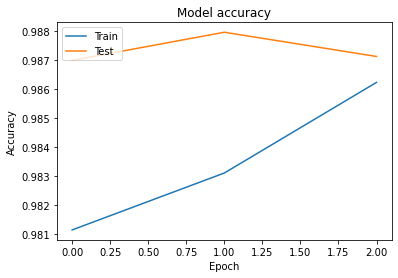

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

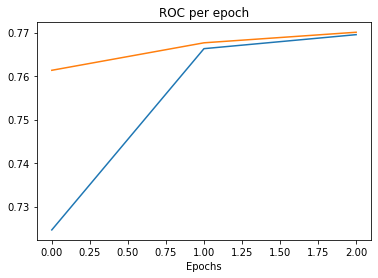

In [20]:
# plot ROC per epoch
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('ROC per epoch')
plt.xlabel('Epochs')
plt.show()

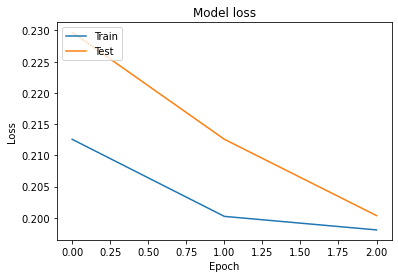

In [21]:
# Plot training & validation loss values per epoch
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [10]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, KFold, StratifiedKFold, cross_val_score, cross_val_predict
import xgboost as xgb

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_models, Y_labels, test_size=0.3, train_size=0.7)

In [13]:
sum_pos = sum(y_train== 1.0)
print(sum_pos)
sum_neg = sum(y_train== 0.0)
print(sum_neg)
ratio = sum_neg / sum_pos
print(ratio)

8054
548443
68.09572883039483


In [7]:
def fdr_XGB(data, topRows):
    topRows_fs = int(round(len(data)*topRows))
    data_topRows = data.head(topRows_fs)
    frauds_current = data_topRows.loc[:,'fraud_label']
    bads_all = data.loc[data['fraud_label'] == 1]
    FDR = sum(frauds_current) / len(bads_all)
    return FDR

In [8]:
def make_data(model, X_data, y_data):
    fraud_proba = model.predict_proba(X_data)[:, 1]
    curr_data = X_data.copy()
    curr_data.insert(0, 'fraud_label', y_data)
    curr_data.insert(1, 'fraud_proba', fraud_proba)
    curr_data = curr_data.sort_values(['fraud_proba'], ascending=False)
    return curr_data

In [14]:
start_xgbfit=pd.datetime.now()
xgb_1 =  xgb.XGBClassifier(objective='binary:logistic', learning_rate = 0.01, 
                           n_estimators=1100, max_depth=5, scale_pos_weight=ratio)
xgb_1.fit(X_train, y_train)
print("DONE!", pd.datetime.now()-start_xgbfit)

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.


DONE! 0:10:28.083243


D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


In [17]:
time_results=pd.datetime.now()

results_dict_XGB={}
for num in range(1,2):
    curr_time=pd.datetime.now()
    curr_model_name = "xgb_" + str(num)
    
    results_dict_XGB[curr_model_name]={'scores':{},
                                   'data':{},
                                   'FDR':{}
                                  }
    
    # Calculate the accuracy scores of the model 
    train_score = vars()[curr_model_name].score(X_train, y_train)
    test_score = vars()[curr_model_name].score(X_test, y_test)
    oot_score = vars()[curr_model_name].score(X_oot, Y_oot)
    
    # Save the accuracy scores of the model
    results_dict_XGB[curr_model_name]['scores']['train_score'] = train_score
    results_dict_XGB[curr_model_name]['scores']['test_score'] = test_score
    results_dict_XGB[curr_model_name]['scores']['oot_score'] = oot_score
    
    # Calculate the ".predict_proba" and make dataframes for all datasets
    train_data = make_data(vars()[curr_model_name], X_train, y_train) 
    test_data = make_data(vars()[curr_model_name], X_test, y_test) 
    oot_data = make_data(vars()[curr_model_name], X_oot, Y_oot) 
    
    # Save all the dataframes for the model
    results_dict_XGB[curr_model_name]['data']['train_data'] = train_data
    results_dict_XGB[curr_model_name]['data']['test_data'] = test_data
    results_dict_XGB[curr_model_name]['data']['oot_data'] = oot_data
    
    # Calculate the FDRs
    train_FDR = fdr_XGB(train_data, 0.03)
    test_FDR = fdr_XGB(test_data, 0.03)
    oot_FDR = fdr_XGB(oot_data, 0.03)
    
    # Save the FDRs
    results_dict_XGB[curr_model_name]['FDR']['train_FDR'] = train_FDR
    results_dict_XGB[curr_model_name]['FDR']['test_FDR'] = test_FDR
    results_dict_XGB[curr_model_name]['FDR']['oot_FDR'] = oot_FDR
    
    print("Done with:",curr_model_name, ";  time:",pd.datetime.now()-curr_time)

print("DONE!", pd.datetime.now()-time_results)

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """Entry point for launching an IPython kernel.
D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  """


Done with: xgb_1 ;  time: 0:01:04.271461
DONE! 0:01:04.271461


D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:43: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:45: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.


In [18]:
for model in results_dict_XGB.keys():
    print(model)
    print(results_dict_XGB[model]['FDR'])

xgb_1
{'train_FDR': 0.5618326297491929, 'test_FDR': 0.5617715617715617, 'oot_FDR': 0.5364605543710022}


In [22]:
for k,v in results_dict_XGB.items():
  maximum_key = max(results_dict_XGB, key=lambda v: results_dict_XGB[v]['FDR']['test_FDR'])
vars()[maximum_key] 

XGBClassifier(learning_rate=0.01, max_depth=5, n_estimators=1100,
              scale_pos_weight=68.09572883039483)

In [23]:
def output_table(y_res_valid,Y_valid):
# returs the output tables
# y_res_valis is y_pred
# Y_valid is y_true
# returns:
# cumulative dataset, Bin Statistics
    no_of_bads =Y_valid.sum()
    no_of_records = len(Y_valid)
    no_of_goods = no_of_records - no_of_bads
    print('no_of_records',no_of_records)
    print('No of bads',no_of_bads)
    print('no_of_goods',no_of_goods)

    fin_tabl_df = pd.DataFrame({'score':y_res_valid,'label': Y_valid}).sort_values(by='score',ascending=False)
    df_pres_cum = pd.DataFrame(columns=['Total # Records','# Goods','# Bads'])
    for i_tbl_df in range(1,21): #21 is the final
    #     print(i_tbl_df)
        top3_res2 = fin_tabl_df.head(round(Y_valid.shape[0]*(i_tbl_df/100)))
        top3_res2#['label'].sum()/sum(Y_valid)
    #     print('No of records:',top3_res2.shape[0])
        df_pres_cum.loc[i_tbl_df-1,'Total # Records'] = top3_res2.shape[0]
    #     print('No of bads:',top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Bads'] = top3_res2['label'].sum()
    #     print('No of goods:',top3_res2.shape[0]- top3_res2['label'].sum())
        df_pres_cum.loc[i_tbl_df-1,'# Goods'] = top3_res2.shape[0]- top3_res2['label'].sum()

    df_pres = df_pres_cum.diff()
    df_pres.loc[0] = df_pres_cum.loc[0]
    df_pres = df_pres.rename(columns={"Total # Records": "# Records"})
    df_pres['% Goods'] = 100*(df_pres['# Goods']/df_pres['# Records'])
    df_pres['% Bads'] = 100*(df_pres['# Bads']/df_pres['# Records'])
    print('Bin statistics')
    df_pres.to_csv('Test_Bin_stats.csv')
    display(df_pres)

    df_pres_cum['% Goods'] = 100*(df_pres_cum['# Goods']/no_of_goods)
    df_pres_cum['% Bads'] = 100*(df_pres_cum['# Bads']/no_of_bads)
    df_pres_cum['KS'] = df_pres_cum['% Bads'] - df_pres_cum['% Goods']
    df_pres_cum['FPR'] = df_pres_cum['# Goods']/df_pres_cum['# Bads']
    df_pres_cum = df_pres_cum.rename(columns={"# Goods": "Cumulative Goods",'# Bads':'Cumulative Bads','% Bads':'% Bads (FDR)'})
    print('Cumulative results')
    df_pres_cum.to_csv('Test_Cum_stats.csv') 
    display(df_pres_cum)
    return df_pres_cum, df_pres

In [30]:
y_train.size

556498

In [26]:
y_train['Fraud Proba'] =  vars()[maximum_key].predict_proba(X_train)[:,1].tolist()
y_test['Fraud Proba'] =  vars()[maximum_key].predict_proba(X_test)[:,1].tolist()
Y_oot['Fraud Proba'] =  vars()[maximum_key].predict_proba(X_oot)[:,1].tolist()

D:\anaconda\envs\py37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [28]:
# Training Set
output_table(y_train['Fraud Proba'],y_train.iloc[:-1])

no_of_records 556497
No of bads 8054
no_of_goods 548443
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,5565,1297,4268,23.3064,76.6936
1,5565,5384,181,96.7475,3.25247
2,5565,5489,76,98.6343,1.36568
3,5565,5512,53,99.0476,0.952381
4,5565,5516,49,99.1195,0.880503
5,5565,5511,54,99.0296,0.97035
6,5565,5521,44,99.2093,0.790656
7,5565,5524,41,99.2633,0.736748
8,5565,5520,45,99.1914,0.808625
9,5565,5525,40,99.2812,0.718778


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,5565,1297,4268,0.236488,52.9923,52.7558,0.303889
1,11130,6681,4449,1.21818,55.2396,54.0215,1.50169
2,16695,12170,4525,2.21901,56.1833,53.9643,2.6895
3,22260,17682,4578,3.22404,56.8413,53.6173,3.86239
4,27825,23198,4627,4.22979,57.4497,53.2199,5.01362
5,33390,28709,4681,5.23464,58.1202,52.8856,6.13309
6,38955,34230,4725,6.2413,58.6665,52.4252,7.24444
7,44520,39754,4766,7.24852,59.1756,51.927,8.34117
8,50085,45274,4811,8.25501,59.7343,51.4793,9.41052
9,55650,50799,4851,9.2624,60.2309,50.9685,10.4719


(   Total # Records Cumulative Goods Cumulative Bads   % Goods % Bads (FDR)       KS       FPR
 0             5565             1297            4268  0.236488      52.9923  52.7558  0.303889
 1            11130             6681            4449   1.21818      55.2396  54.0215   1.50169
 2            16695            12170            4525   2.21901      56.1833  53.9643    2.6895
 3            22260            17682            4578   3.22404      56.8413  53.6173   3.86239
 4            27825            23198            4627   4.22979      57.4497  53.2199   5.01362
 5            33390            28709            4681   5.23464      58.1202  52.8856   6.13309
 6            38955            34230            4725    6.2413      58.6665  52.4252   7.24444
 7            44520            39754            4766   7.24852      59.1756   51.927   8.34117
 8            50085            45274            4811   8.25501      59.7343  51.4793   9.41052
 9            55650            50799            48

In [32]:
# Testing Set
output_table(y_test['Fraud Proba'],y_test.iloc[:-1])

no_of_records 238499
No of bads 3432
no_of_goods 235067
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,2385,559,1826,23.4382,76.5618
1,2385,2311,74,96.8973,3.10273
2,2385,2357,28,98.826,1.174
3,2385,2366,19,99.2034,0.796646
4,2385,2366,19,99.2034,0.796646
5,2385,2361,24,98.9937,1.00629
6,2385,2369,16,99.3291,0.67086
7,2385,2358,27,98.8679,1.13208
8,2385,2362,23,99.0356,0.964361
9,2385,2364,21,99.1195,0.880503


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,2385,559,1826,0.237805,53.2051,52.9673,0.306134
1,4770,2870,1900,1.22093,55.3613,54.1404,1.51053
2,7155,5227,1928,2.22362,56.1772,53.9535,2.7111
3,9540,7593,1947,3.23014,56.7308,53.5006,3.89985
4,11925,9959,1966,4.23666,57.2844,53.0477,5.06562
5,14310,12320,1990,5.24106,57.9837,52.7426,6.19095
6,16695,14689,2006,6.24886,58.4499,52.201,7.32253
7,19080,17047,2033,7.25197,59.2366,51.9846,8.38515
8,21465,19409,2056,8.25679,59.9068,51.65,9.44018
9,23850,21773,2077,9.26247,60.5186,51.2562,10.4829


(   Total # Records Cumulative Goods Cumulative Bads   % Goods % Bads (FDR)       KS       FPR
 0             2385              559            1826  0.237805      53.2051  52.9673  0.306134
 1             4770             2870            1900   1.22093      55.3613  54.1404   1.51053
 2             7155             5227            1928   2.22362      56.1772  53.9535    2.7111
 3             9540             7593            1947   3.23014      56.7308  53.5006   3.89985
 4            11925             9959            1966   4.23666      57.2844  53.0477   5.06562
 5            14310            12320            1990   5.24106      57.9837  52.7426   6.19095
 6            16695            14689            2006   6.24886      58.4499   52.201   7.32253
 7            19080            17047            2033   7.25197      59.2366  51.9846   8.38515
 8            21465            19409            2056   8.25679      59.9068    51.65   9.44018
 9            23850            21773            20

In [33]:
# Validation Set
output_table(Y_oot['Fraud Proba'],Y_oot.iloc[:-1])

no_of_records 163772
No of bads 2345
no_of_goods 161427
Bin statistics


,# Records,# Goods,# Bads,% Goods,% Bads
0,1638,447,1191,27.2894,72.7106
1,1637,1588,49,97.0067,2.99328
2,1638,1620,18,98.9011,1.0989
3,1638,1624,14,99.1453,0.854701
4,1638,1625,13,99.2063,0.793651
5,1637,1625,12,99.267,0.733048
6,1638,1615,23,98.5958,1.40415
7,1638,1618,20,98.779,1.221
8,1637,1628,9,99.4502,0.549786
9,1638,1629,9,99.4505,0.549451


Cumulative results


,Total # Records,Cumulative Goods,Cumulative Bads,% Goods,% Bads (FDR),KS,FPR
0,1638,447,1191,0.276905,50.7889,50.512,0.375315
1,3275,2035,1240,1.26063,52.8785,51.6178,1.64113
2,4913,3655,1258,2.26418,53.6461,51.3819,2.90541
3,6551,5279,1272,3.27021,54.2431,50.9729,4.15016
4,8189,6904,1285,4.27686,54.7974,50.5206,5.37276
5,9826,8529,1297,5.2835,55.3092,50.0257,6.57594
6,11464,10144,1320,6.28395,56.29,50.006,7.68485
7,13102,11762,1340,7.28627,57.1429,49.8566,8.77761
8,14739,13390,1349,8.29477,57.5267,49.2319,9.92587
9,16377,15019,1358,9.3039,57.9104,48.6066,11.0596


(   Total # Records Cumulative Goods Cumulative Bads   % Goods % Bads (FDR)       KS       FPR
 0             1638              447            1191  0.276905      50.7889   50.512  0.375315
 1             3275             2035            1240   1.26063      52.8785  51.6178   1.64113
 2             4913             3655            1258   2.26418      53.6461  51.3819   2.90541
 3             6551             5279            1272   3.27021      54.2431  50.9729   4.15016
 4             8189             6904            1285   4.27686      54.7974  50.5206   5.37276
 5             9826             8529            1297    5.2835      55.3092  50.0257   6.57594
 6            11464            10144            1320   6.28395        56.29   50.006   7.68485
 7            13102            11762            1340   7.28627      57.1429  49.8566   8.77761
 8            14739            13390            1349   8.29477      57.5267  49.2319   9.92587
 9            16377            15019            13